### Fine tuning Yolov11 model on our custom dataset :

In [2]:
!nvidia-smi

Thu Feb  6 11:58:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [6]:
!rm -rf /root/.config/Google/

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow
rf = Roboflow(api_key="QBcIGwku5EDtTx0E0W0b")
project = rf.workspace("infantbabiessleep").project("sudden-infant-death-syndrome")
version = project.version(3)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to sudden-infant-death-syndrome-3 in yolov11:: 100%|██████████| 15970/15970 [00:02<00:00, 6098.99it/s] 


In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 60.1MB/s]
New https://pypi.org/project/ultralytics/8.3.72 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/sudden-infant-death-syndrome-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic

In [10]:
!cp -r {HOME}/datasets /content/drive/MyDrive/
!cp -r runs /content/drive/MyDrive/

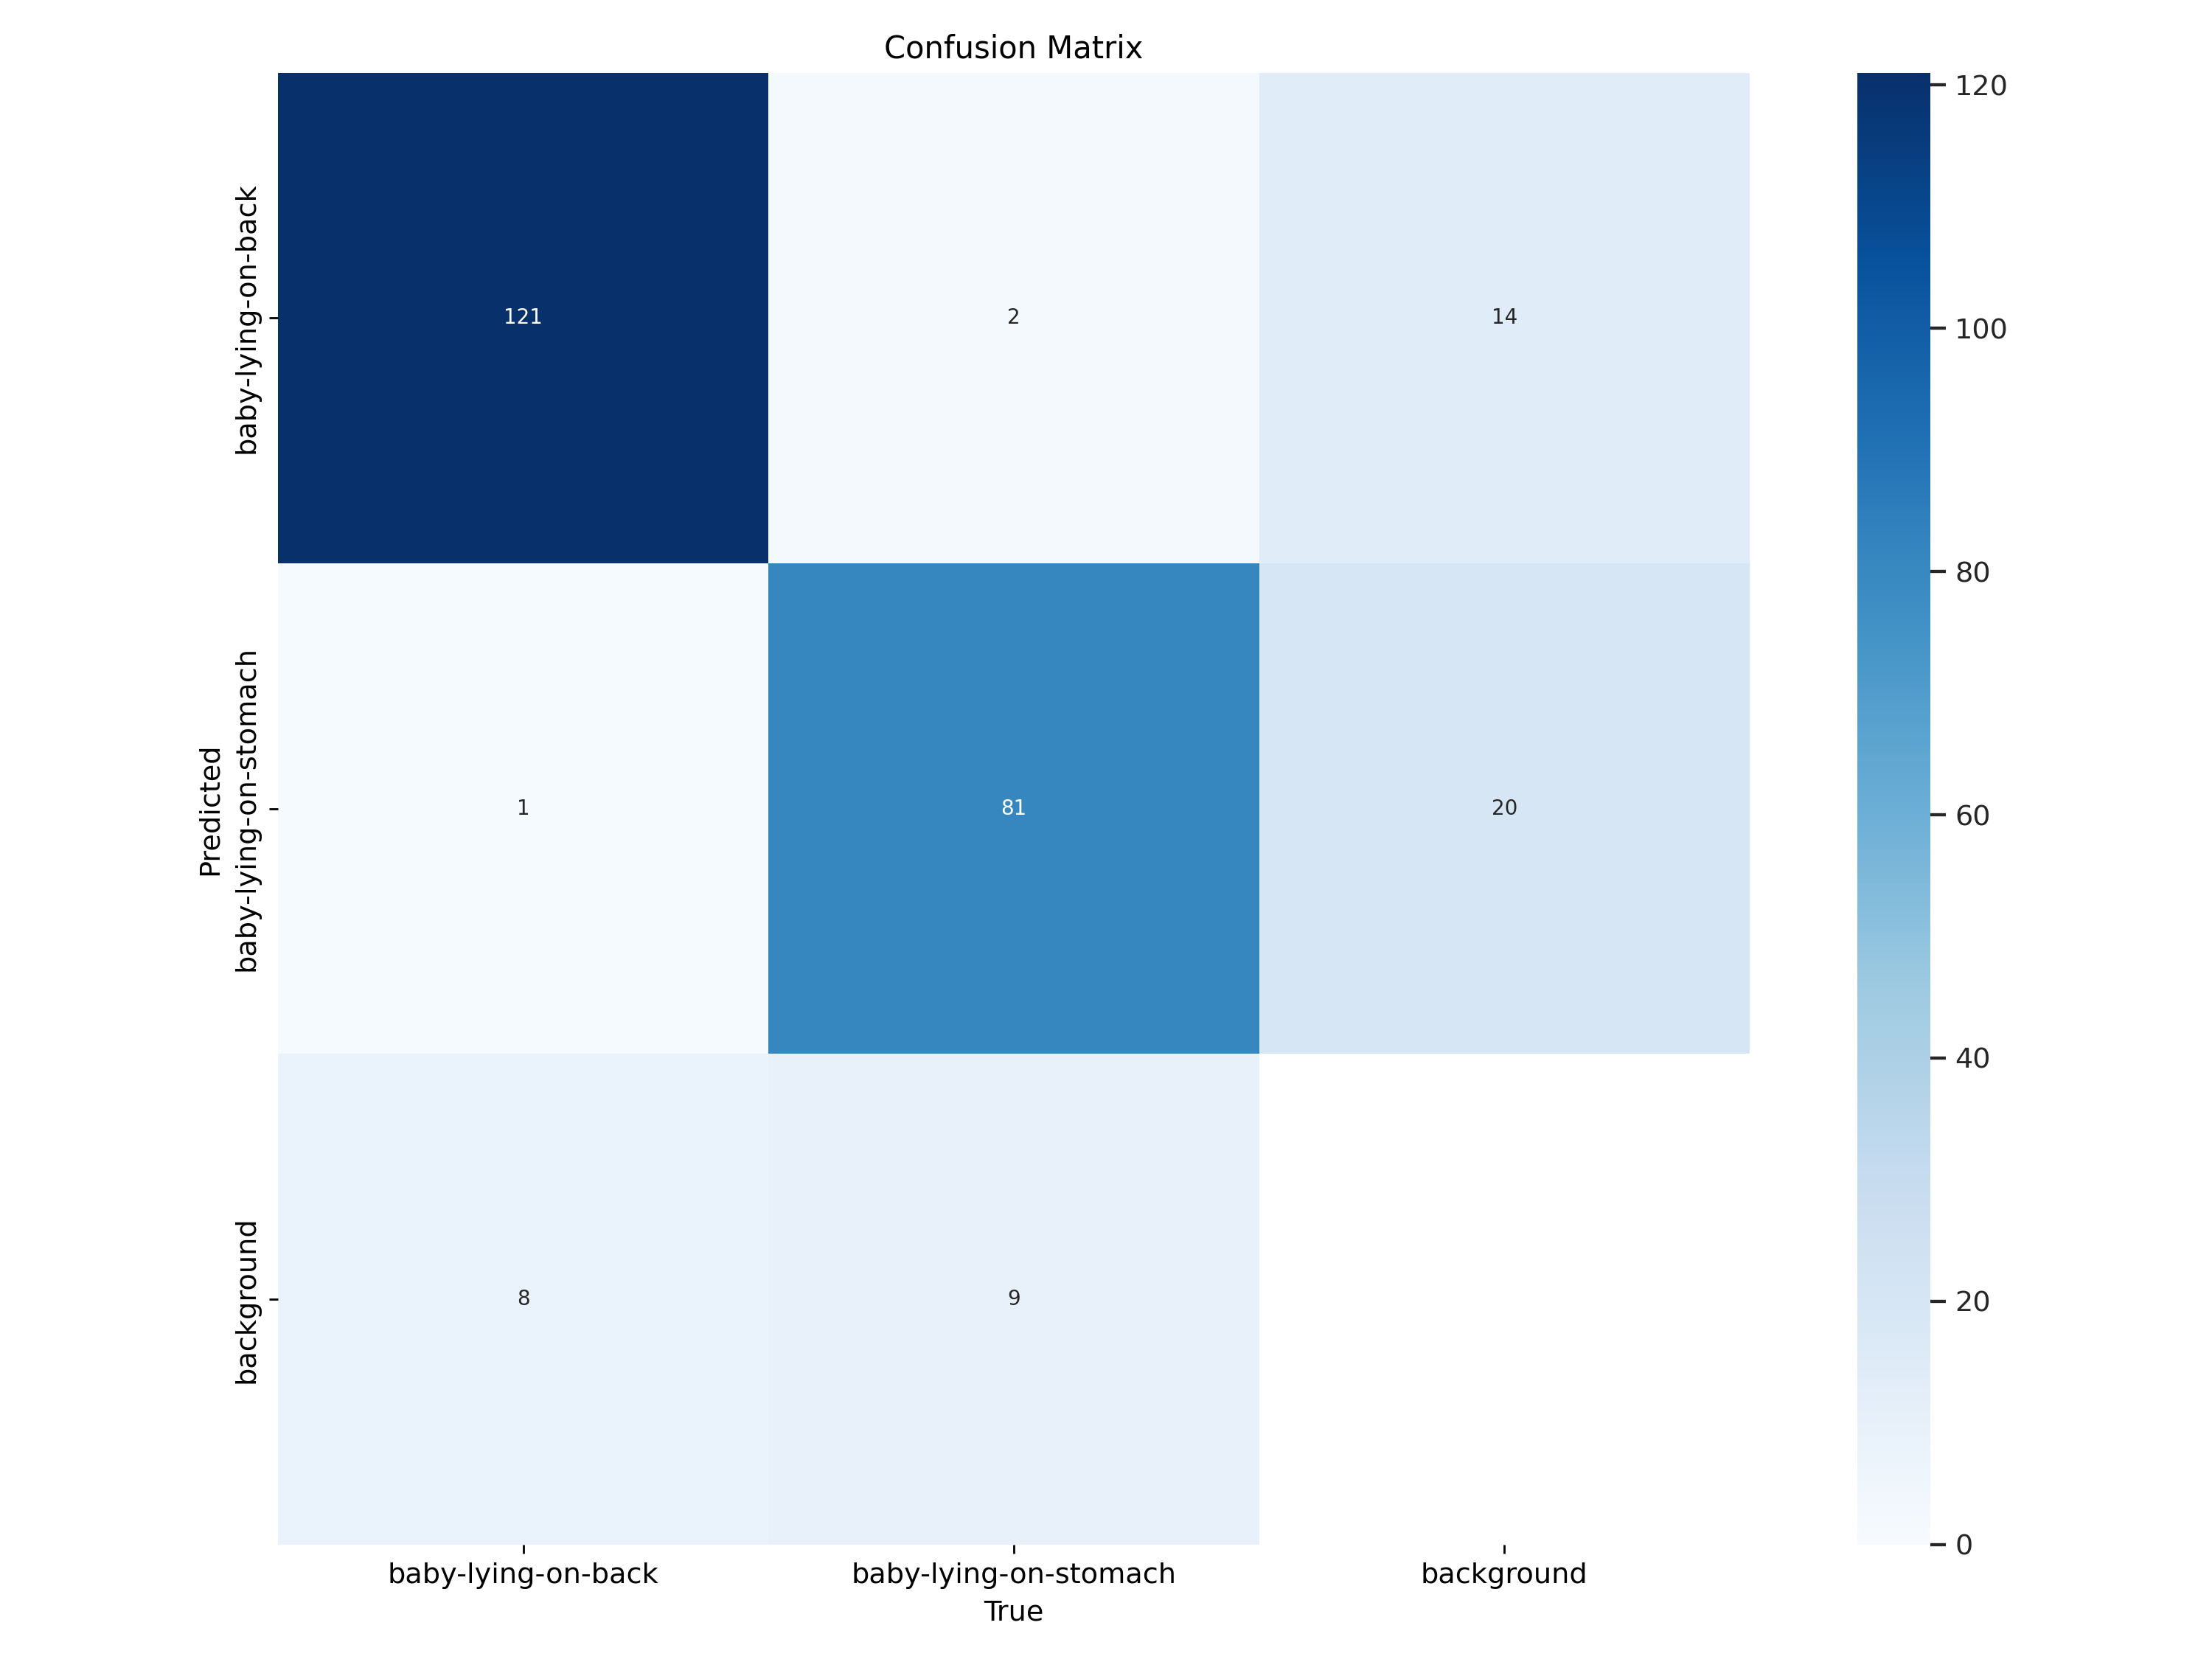

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

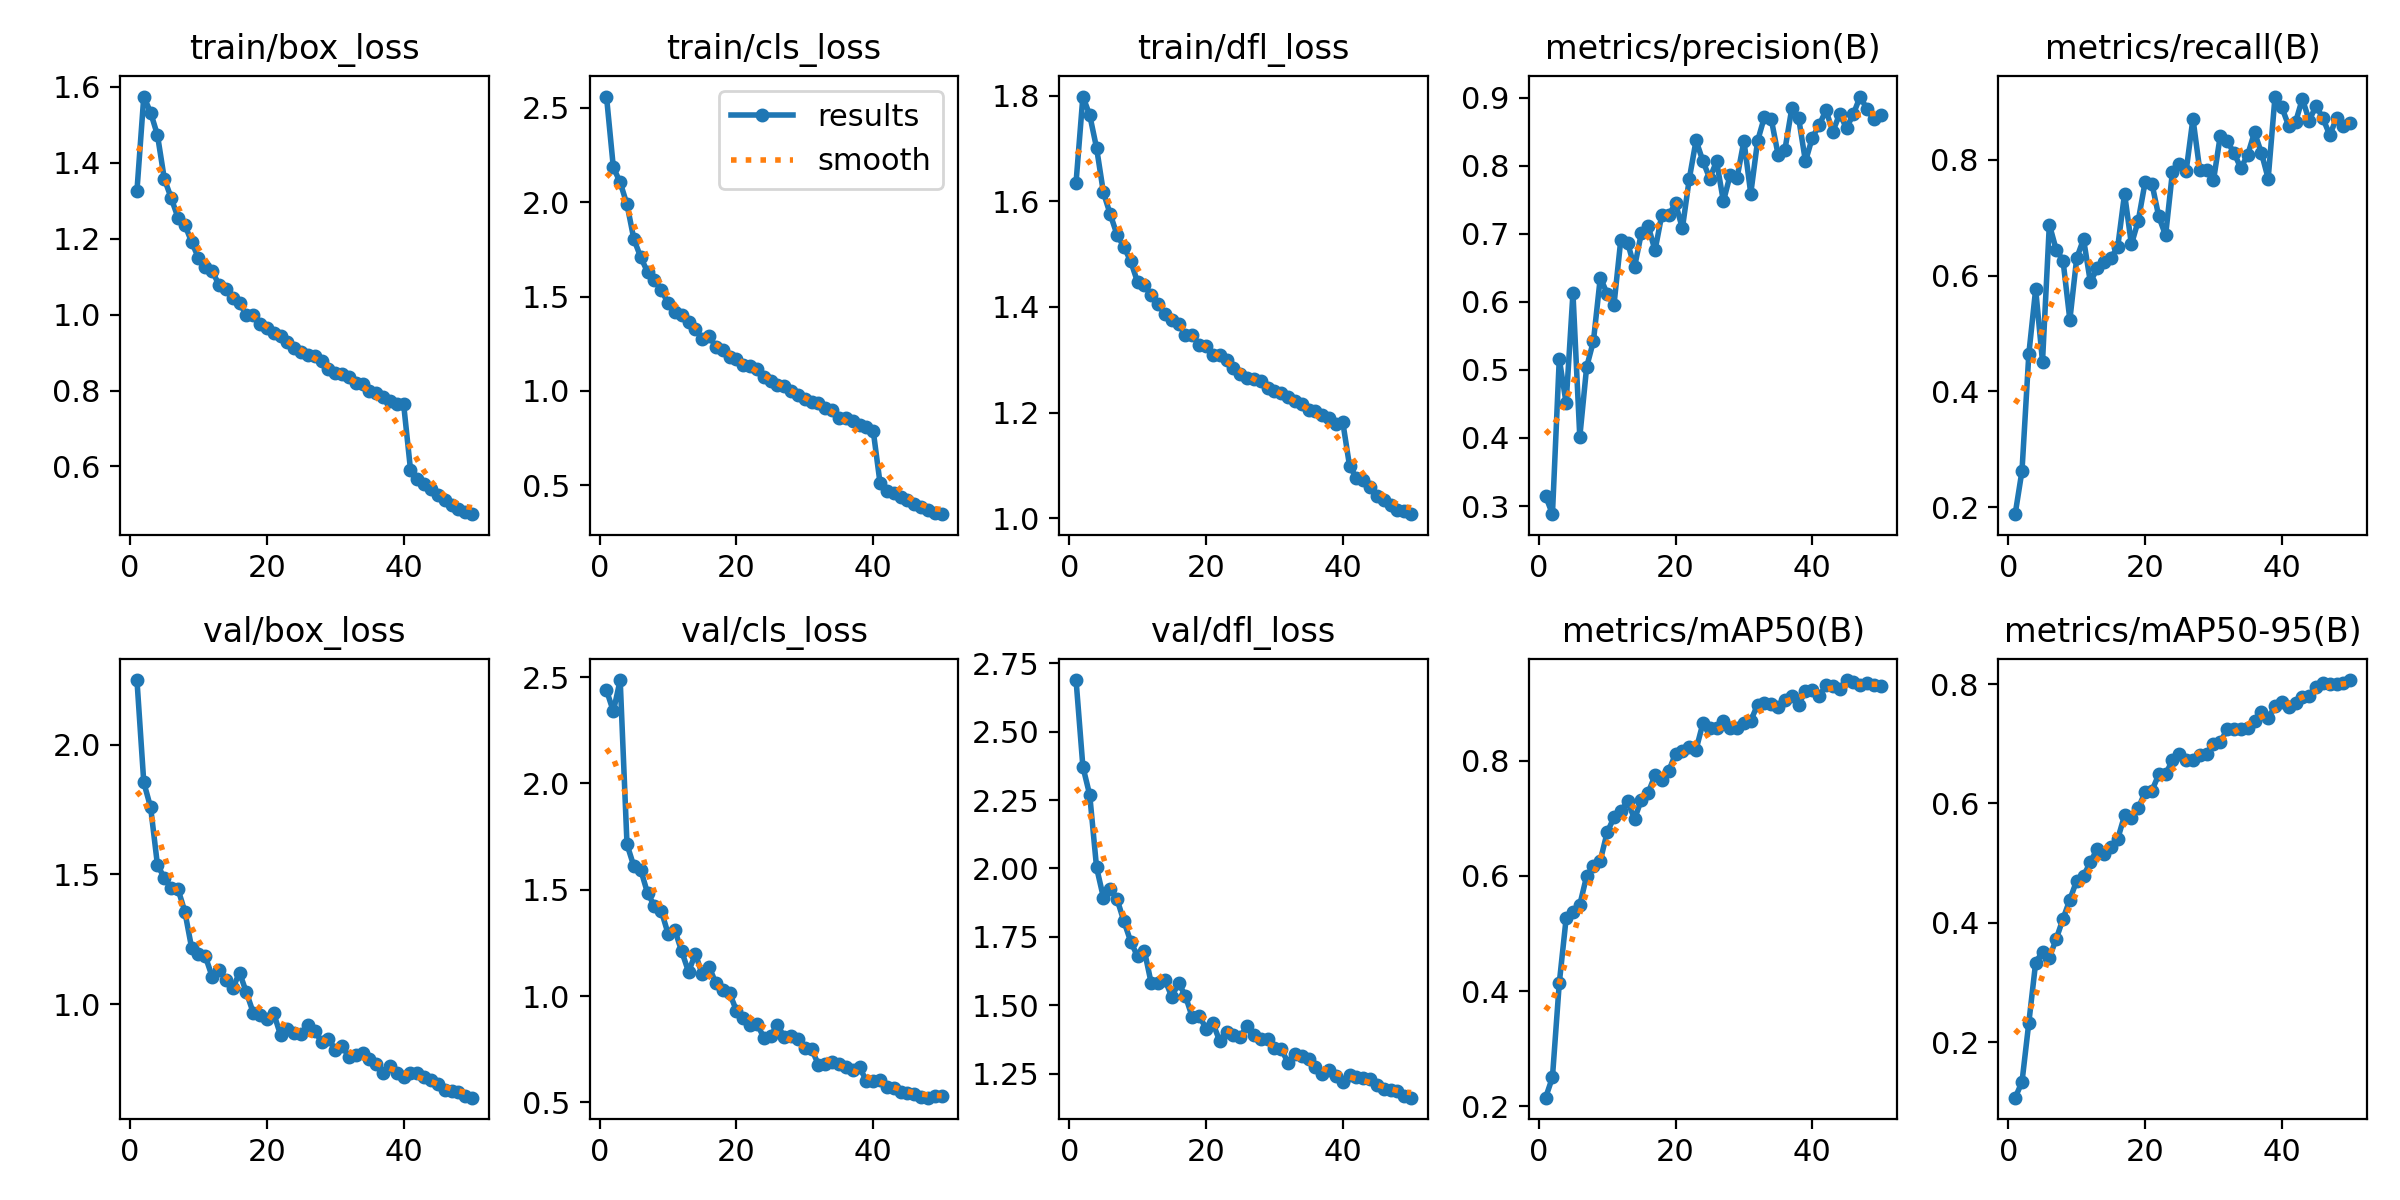

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

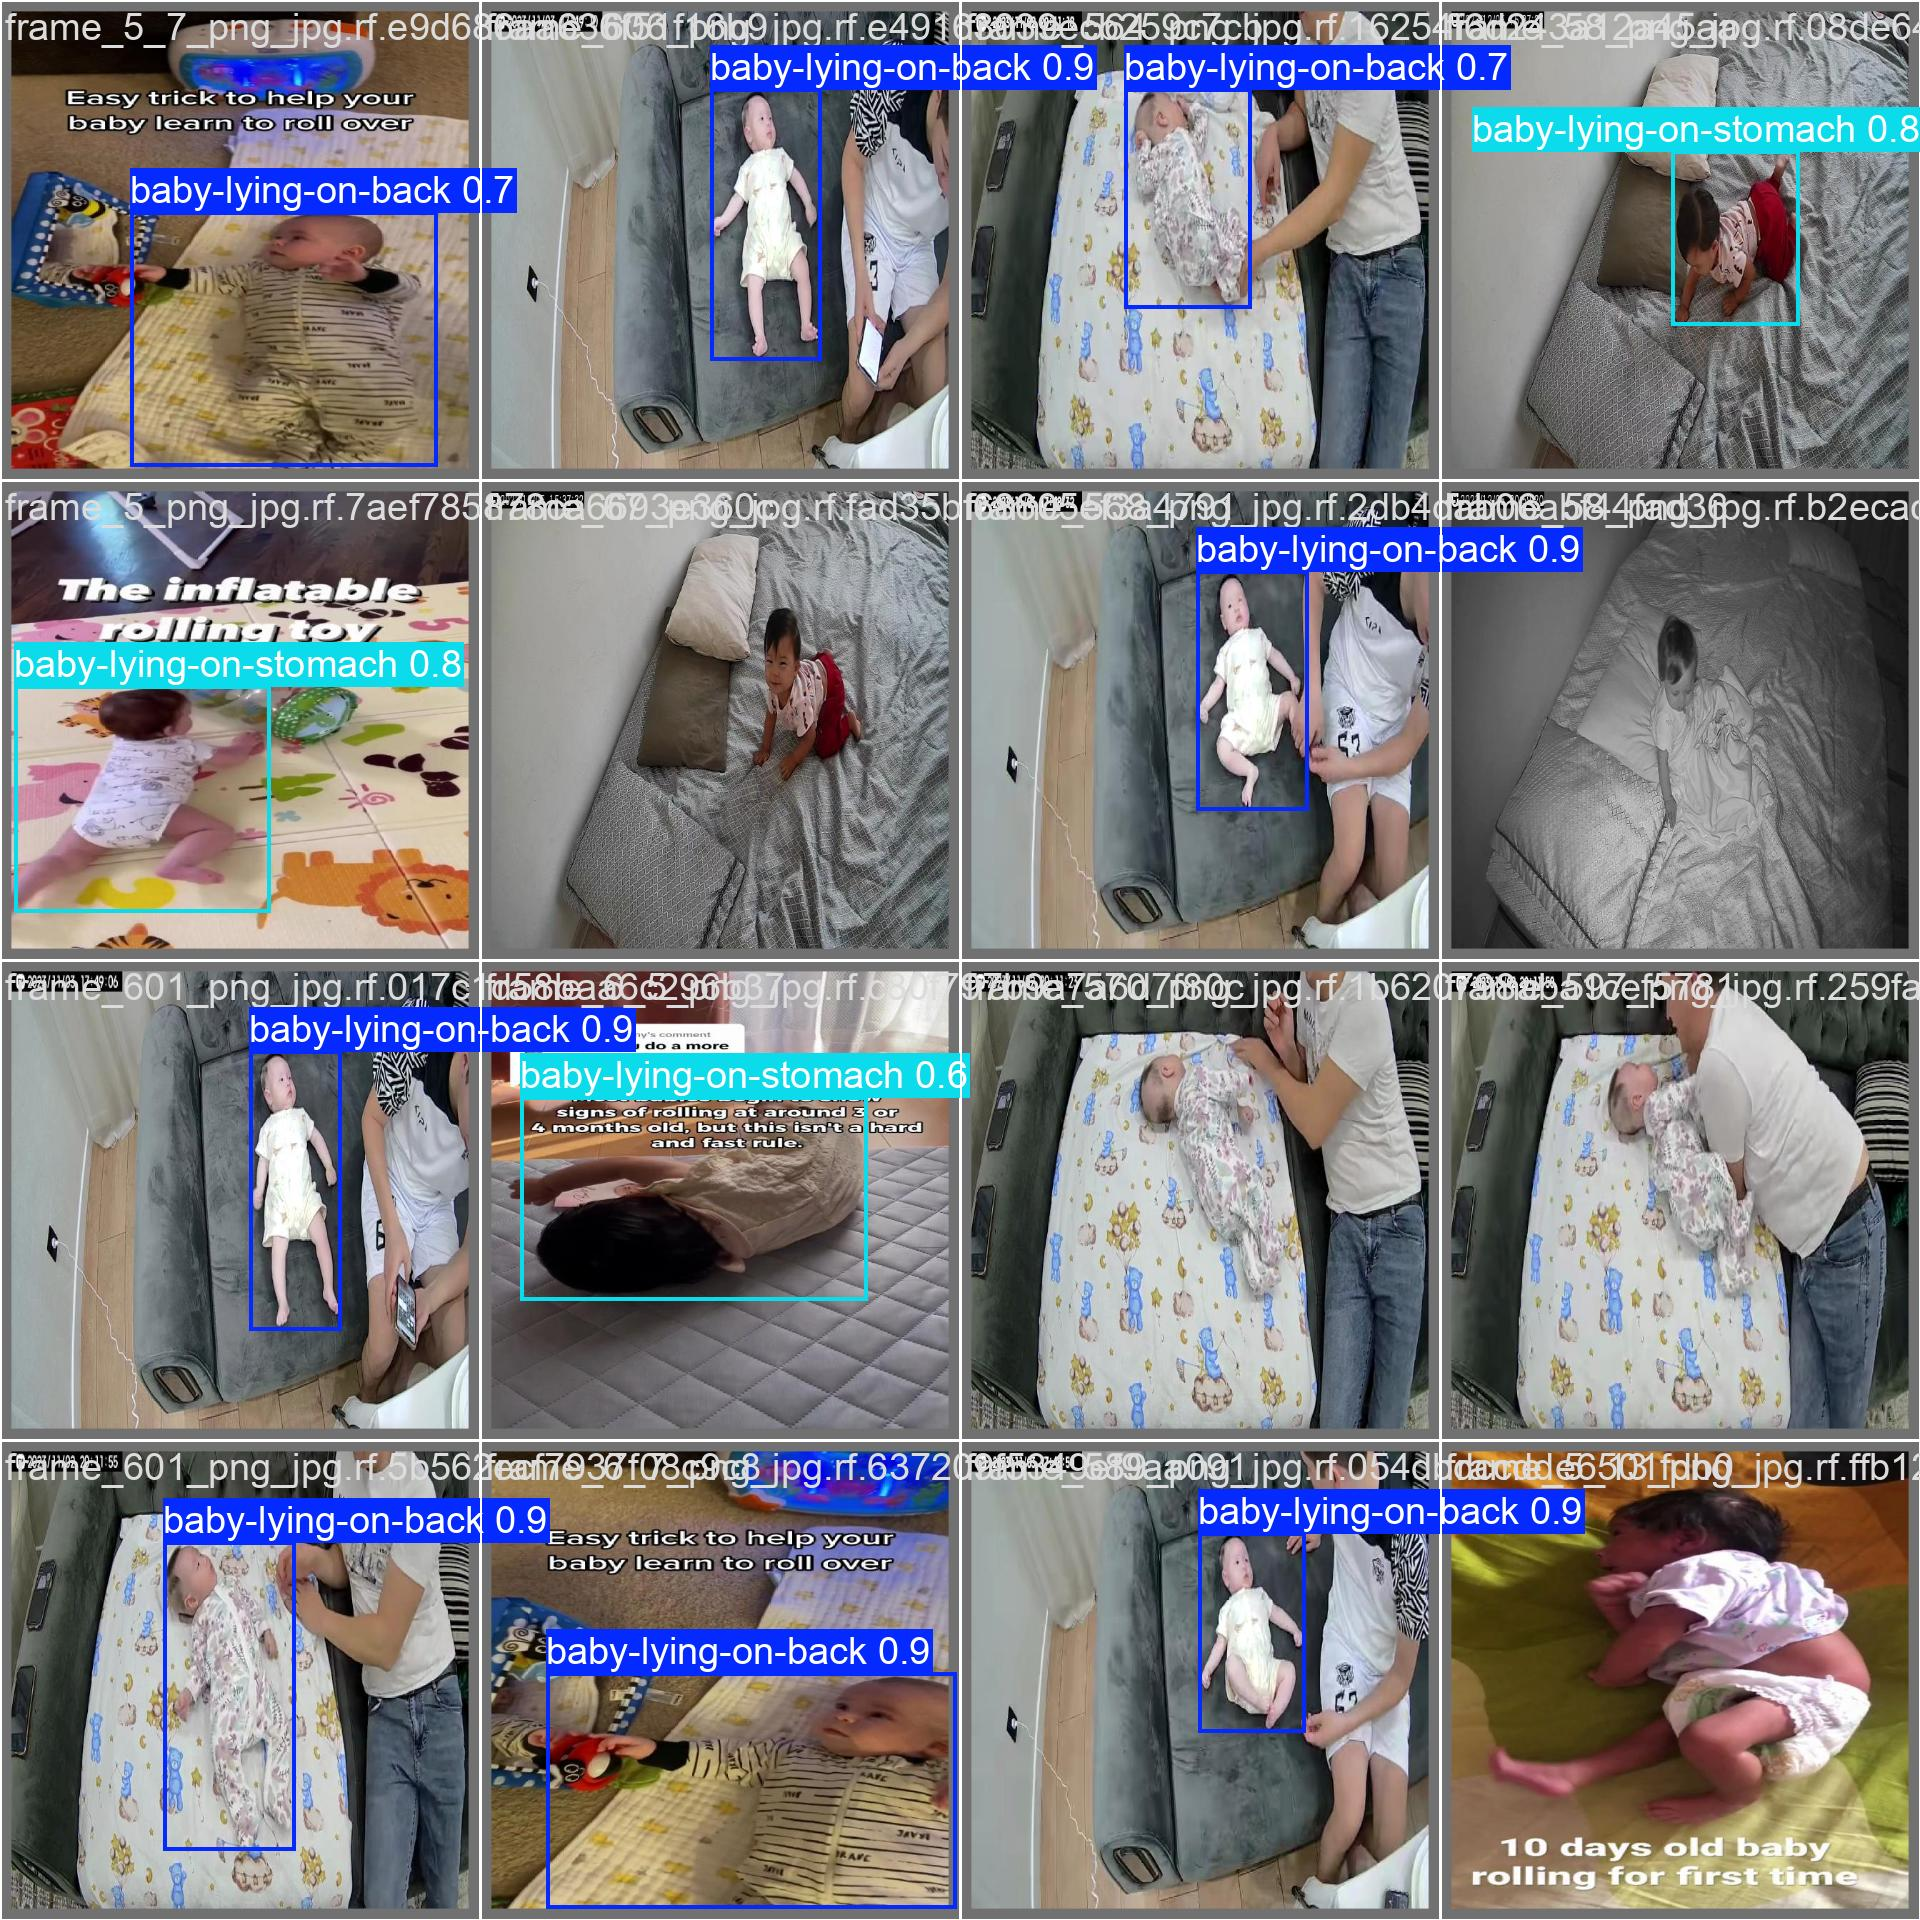

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

### validation

In [14]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/sudden-infant-death-syndrome-3/valid/labels.cache... 307 images, 85 backgrounds, 0 corrupt: 100% 307/307 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9, len(boxes) = 222. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 20/20 [00:05<00:00,  3.97it/s]
                   all        307        222      0.874      0.863       0.93      0.806
    baby-lying-on-back        130        130       0.89      0.875       0.94      0.784
 baby-lying-on-stomach         92         92      0.858      0.851       0.92      0.828
Speed: 1.4ms prep

### inference

In [15]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/307 /content/datasets/sudden-infant-death-syndrome-3/test/images/05EF05D1-F2DA-45A8-9985-09326C822E4B_JPG.rf.1c8c372aada9ac9b3c38b23c67b97e26.jpg: 640x640 (no detections), 21.4ms
image 2/307 /content/datasets/sudden-infant-death-syndrome-3/test/images/1214_png_jpg.rf.16ebb9fd0b4bdb16f5255f5a9145193b.jpg: 640x640 1 baby-lying-on-stomach, 34.4ms
image 3/307 /content/datasets/sudden-infant-death-syndrome-3/test/images/1923_png_jpg.rf.acb1066cbb1411f216c516f8a6942eac.jpg: 640x640 1 baby-lying-on-stomach, 56.4ms
image 4/307 /content/datasets/sudden-infant-death-syndrome-3/test/images/1962_png_jpg.rf.ae00d246aa04d3790517be6c45b7a83d.jpg: 640x640 1 baby-lying-on-stomach, 25.4ms
image 5/307 /content/datasets/sudden-infant-death-syndrome-3/test/images/19_jpg.rf.db226ec867b5666c1b7c09364851e05f.jpg: 640x640 1 baby-lying-on-

In [16]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/infantbabiessleep/sudden-infant-death-syndrome/3
Share your model with the world at: https://universe.roboflow.com/infantbabiessleep/sudden-infant-death-syndrome/model/3


### Deploy on roboflow :

In [17]:
project = rf.workspace("infantbabiessleep").project("sudden-infant-death-syndrome")
version = project.version(3)
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/infantbabiessleep/sudden-infant-death-syndrome/3
Share your model with the world at: https://universe.roboflow.com/infantbabiessleep/sudden-infant-death-syndrome/model/3
